<a href="https://colab.research.google.com/github/jessiececilya/Projects/blob/main/Bitcoin_Stock_TS_forecast_(Prophet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load data from Alphavantage API**

In [3]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
cc = CryptoCurrencies(key='WVDD86DKHHF5YSH8',output_format='pandas')
btc, meta_data  = cc.get_digital_currency_daily(symbol='BTC', market='CNY')
btc.head(100)

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2021-03-02,320626.669248,49595.76,324532.960000,50200.00,319793.744416,49466.92,319818.246008,49470.71,3713.229440,3713.229440
2021-03-01,291782.994328,45134.11,321882.392000,49790.00,290596.186344,44950.53,320570.231544,49587.03,85086.111648,85086.111648
2021-02-28,298051.005816,46103.67,301508.316208,46638.46,277986.400000,43000.00,291793.014768,45135.66,83055.369042,83055.369042
2021-02-27,299170.773824,46276.88,312857.531200,48394.00,290916.000000,45000.00,298068.848664,46106.43,66060.834292,66060.834292
2021-02-26,304322.249704,47073.73,313052.186328,48424.11,285141.511344,44106.78,299170.709176,46276.87,109423.200663,109423.200663
...,...,...,...,...,...,...,...,...,...,...
2020-11-27,110867.893656,17149.47,112860.021776,17457.62,106268.899584,16438.08,110803.568896,17139.52,85297.024787,85297.024787
2020-11-26,121013.492184,18718.83,122281.885944,18915.03,104652.182400,16188.00,110867.893656,17149.47,181005.246693,181005.246693
2020-11-25,123865.568000,19160.00,125961.520808,19484.21,119600.545496,18500.27,121015.302328,18719.11,93266.576887,93266.576887


In [4]:
#pip install alpha_vantage

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet

In [12]:
btc.to_csv("BTCPrice.csv", index='date', header=True)
btc=pd.read_csv("BTCPrice.csv")
btc.columns

Index(['date', '1a. open (CNY)', '1b. open (USD)', '2a. high (CNY)',
       '2b. high (USD)', '3a. low (CNY)', '3b. low (USD)', '4a. close (CNY)',
       '4b. close (USD)', '5. volume', '6. market cap (USD)'],
      dtype='object')

In [26]:
btc.rename(columns={'date': 'ds', '4b. close (USD)': 'y'},inplace=True)
btc.sort_values('ds',ascending=True,inplace=True)
btc['ds']= pd.to_datetime(btc['ds'])
btc['y']=btc['y'].astype(float)

In [41]:
btc.head

<bound method NDFrame.head of             ds  1a. open (CNY)  ...      5. volume  6. market cap (USD)
999 2018-06-07    49512.545592  ...   25062.227202         25062.227202
998 2018-06-08    49721.293984  ...   23396.804671         23396.804671
997 2018-06-09    49154.718912  ...   19339.885176         19339.885176
996 2018-06-10    48432.536104  ...   52342.020032         52342.020032
995 2018-06-11    43734.372000  ...   34552.162303         34552.162303
..         ...             ...  ...            ...                  ...
4   2021-02-26   304322.249704  ...  109423.200663        109423.200663
3   2021-02-27   299170.773824  ...   66060.834292         66060.834292
2   2021-02-28   298051.005816  ...   83055.369042         83055.369042
1   2021-03-01   291782.994328  ...   85086.111648         85086.111648
0   2021-03-02   320626.669248  ...    3713.229440          3713.229440

[1000 rows x 11 columns]>

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


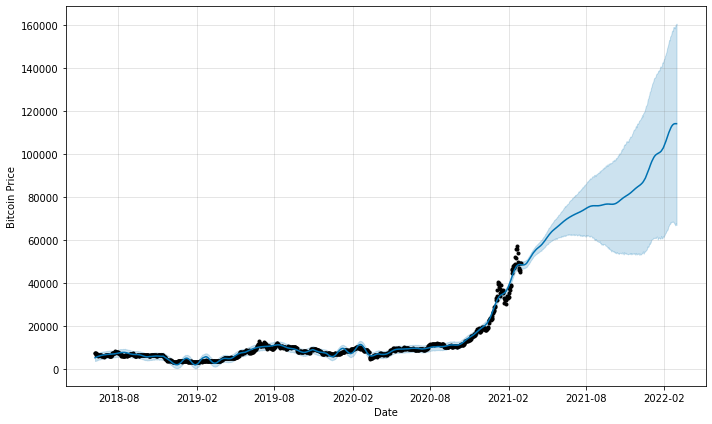

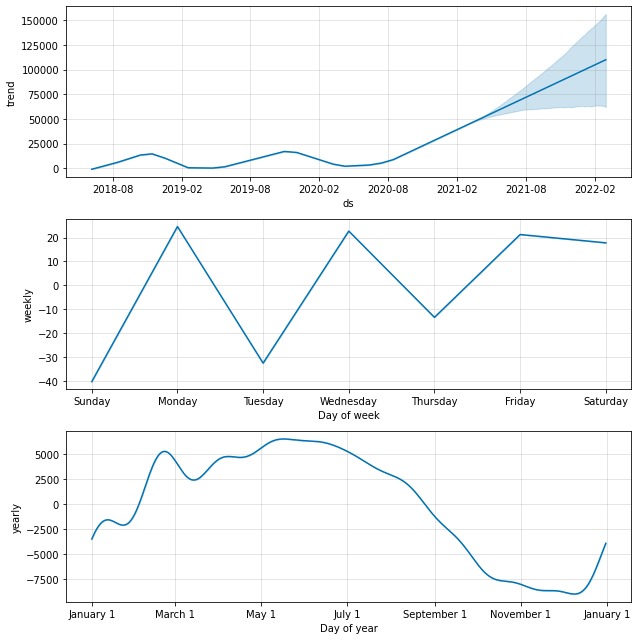

In [49]:
df_prophetb = Prophet()
#fit the model
df_prophetb.fit(btc1)
# Forecast for 1 year
fcast_time=365   
df_forecastb = df_prophetb.make_future_dataframe(periods= fcast_time, freq='D')
df_forecastb.tail(10)
# Do forecasting
df_forecastb = df_prophetb.predict(df_forecastb)

df_forecastb[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#Do the plot
df_prophetb.plot(df_forecastb, xlabel = 'Date', ylabel = 'Bitcoin Price')
#Do the plot
fig = df_prophetb.plot_components(df_forecastb)
plt.show()